## Classifying reviews as fake or real using machine learning 

In [2]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings, string
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

#### loading data and exploring data

In [5]:
df=pd.read_csv(r"C:\Users\DURGA\Desktop\final_project_fake_review\dataset\TP_DS.csv")

In [7]:
df.head()

,category,rating,label,text_,cleaned_text
0,Home_and_Kitchen_5,5.0,CG,"['love', 'well', 'made', 'sturdi', 'comfort', ...",love well made sturdi comfort love pretti
1,Home_and_Kitchen_5,5.0,CG,"['love', 'great', 'upgrad', 'origin', ""'ve"", '...",love great upgrad origin 've mine coupl year
2,Home_and_Kitchen_5,5.0,CG,"['pillow', 'save', 'back', 'love', 'look', 'fe...",pillow save back love look feel pillow
3,Home_and_Kitchen_5,1.0,CG,"['miss', 'inform', 'use', 'great', 'product', ...",miss inform use great product price
4,Home_and_Kitchen_5,5.0,CG,"['nice', 'set', 'good', 'qualiti', 'set', 'two...",nice set good qualiti set two month


In [9]:
# dropping text_ column as it contains raw textual data and focussing on cleaned_text 
df.drop('text_',axis=1,inplace= True)

In [11]:
df.head()

,category,rating,label,cleaned_text
0,Home_and_Kitchen_5,5.0,CG,love well made sturdi comfort love pretti
1,Home_and_Kitchen_5,5.0,CG,love great upgrad origin 've mine coupl year
2,Home_and_Kitchen_5,5.0,CG,pillow save back love look feel pillow
3,Home_and_Kitchen_5,1.0,CG,miss inform use great product price
4,Home_and_Kitchen_5,5.0,CG,nice set good qualiti set two month


#### #dropping null values if any

In [13]:

df.dropna(inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40431 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   category      40431 non-null  object 
 1   rating        40431 non-null  float64
 2   label         40431 non-null  object 
 3   cleaned_text  40431 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.5+ MB


#### #creating a length column which computes the length( no of characters)in each row

In [17]:

df['length'] = df['cleaned_text'].apply(len)

#### #plotting the Histogram that represents distribution of length of cleaned_text_column

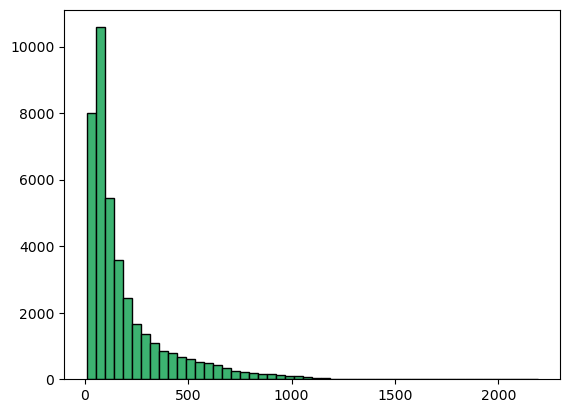

In [37]:
plt.hist(df['length'],bins=50,color='#3CB371', edgecolor='black')
plt.show()


#### #summary statistics for numerical columns within each group (label)

In [40]:
df.groupby('label').describe()

rating                                                length  \
         count      mean       std  min  25%  50%  75%  max    count   
label                                                                  
CG     20215.0  4.259906  1.141092  1.0  4.0  5.0  5.0  5.0  20215.0   
OR     20216.0  4.253265  1.147652  1.0  4.0  5.0  5.0  5.0  20216.0   

                                                                
             mean         std  min   25%    50%    75%     max  
label                                                           
CG     156.669058  158.278508  9.0  51.0   89.0  195.0  1198.0  
OR     222.782944  239.406536  8.0  69.0  125.0  276.0  2190.0

#### # Plotting Histogram that represents distribution of length of label groups(CG,OR)

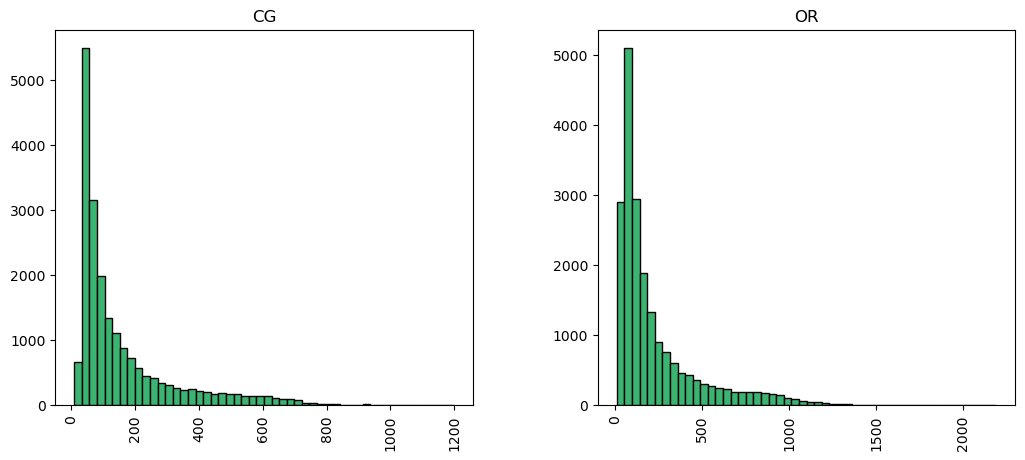

In [45]:
df.hist(column='length',by='label',bins=50,color='#3CB371',edgecolor='black',figsize=(12,5))
plt.show()

In [47]:
df.length.describe()

count    40431.000000
mean       189.726819
std        205.611178
min          8.000000
25%         58.000000
50%        106.000000
75%        232.000000
max       2190.000000
Name: length, dtype: float64

In [51]:
#define a text_process function that Removes punctuation, Splits the text into words,Removes common stopwords.
def text_process(review):
    nopunc = [char for char in review if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

### Bag of Words (BoW) Transformation
##### using CountVectorizer from scikit-learn to convert the preprocessed text into a Bag of Words representation, where-Each word in the corpus is treated as a feature,the frequency of each word in a document is counted

In [54]:
# Bag of Words 
bow_transformer = CountVectorizer(analyzer=text_process)
bow_transformer

CountVectorizer(analyzer=<function text_process at 0x00000156A5BA16C0>)

#### printing the number of unique words in your vocabulary, which corresponds to the number of distinct features

In [56]:
bow_transformer.fit(df['cleaned_text'])
print("Total Vocabulary:",len(bow_transformer.vocabulary_))

Total Vocabulary: 34489


In [59]:
review1 = df['cleaned_text'][0]
review1

'love well made sturdi comfort love pretti'

#### Convert  (review1) into a numerical Bag of Words representation, based on the vocabulary learned earlier from the entire dataset
####  Sparse Matrix Output

In [63]:
bow_msg1 = bow_transformer.transform([review1])
print(bow_msg1)
print(bow_msg1.shape)
print("There are 5 unique words in the 1st review and onw words has 2 count")

  (0, 7329)	1
  (0, 18420)	2
  (0, 18699)	1
  (0, 23866)	1
  (0, 29260)	1
  (0, 33242)	1
(1, 34489)
There are 5 unique words in the 1st review and onw words has 2 count


In [65]:
print(bow_transformer.get_feature_names_out()[18426])
print(bow_transformer.get_feature_names_out()[23874])

lovei
prevel


In [69]:
bow_reviews = bow_transformer.transform(df['cleaned_text'])

In [71]:
print("Shape of Bag of Words Transformer for the entire reviews corpus:",bow_reviews.shape)
print("Amount of non zero values in the bag of words model:",bow_reviews.nnz)

Shape of Bag of Words Transformer for the entire reviews corpus: (40431, 34489)
Amount of non zero values in the bag of words model: 1001954


In [73]:
print("Sparsity:",np.round((bow_reviews.nnz/(bow_reviews.shape[0]*bow_reviews.shape[1]))*100,2))

Sparsity: 0.07


#### Transforms the BoW representation of the specific review (bow_msg1) into its TF-IDF representation
##### BoW counts the occurrences of words, while TF-IDF adjusts these counts based on how common or rare a word is across all documents

In [76]:
tfidf_transformer = TfidfTransformer().fit(bow_reviews)
tfidf_rev4 = tfidf_transformer.transform(bow_msg1)
print(bow_msg1)

  (0, 7329)	1
  (0, 18420)	2
  (0, 18699)	1
  (0, 23866)	1
  (0, 29260)	1
  (0, 33242)	1


In [78]:
# accessing the IDF (Inverse Document Frequency) values for specific words
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['food']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['pretti']])

5.003433005027503
4.00547486975281


#### IDF Values: High IDF values suggest that a word is rare across the corpus, making it more important for a specific document. Low IDF values indicate that the word is common across many documents, making it less informative for distinguishing between documents.
#### The IDF values help adjust the raw term frequencies (from the BoW model) to make the features more meaningful when building machine learning models.

In [81]:
# Transforming the Entire Corpus
tfidf_reviews = tfidf_transformer.transform(bow_reviews)
print("Shape:",tfidf_reviews.shape)
print("No. of Dimensions:",tfidf_reviews.ndim)

Shape: (40431, 34489)
No. of Dimensions: 2


## classification using Machine learning models

###  text classification using a Multinomial Naive Bayes (MultinomialNB) model.

In [85]:
# MultinominalNB

# Assuming 'cleaned_text' is your TF-IDF feature matrix and 'label' contains the target values
# Split the data into training and test sets (e.g., 80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['label'], test_size=0.2, random_state=42)

# Create the pipeline with CountVectorizer, TfidfTransformer, and MultinomialNB
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),    # Convert text to Bag of Words
    ('tfidf', TfidfTransformer()),                      # Transform BOW to TF-IDF
    ('classifier', MultinomialNB())                     # Train the Naive Bayes classifier
])
# Train the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
mn_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, mn_pred)
print("Accuracy:", accuracy)

# Detailed classification report
print("Classification Report:\n", classification_report(y_test, mn_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, mn_pred))

print('Model Prediction Accuracy:',str(np.round(accuracy_score(y_test,mn_pred)*100,2)) + '%')

Accuracy: 0.8475330777791518
Classification Report:
               precision    recall  f1-score   support

          CG       0.82      0.88      0.85      4018
          OR       0.87      0.81      0.84      4069

    accuracy                           0.85      8087
   macro avg       0.85      0.85      0.85      8087
weighted avg       0.85      0.85      0.85      8087

Confusion Matrix:
 [[3541  477]
 [ 756 3313]]
Model Prediction Accuracy: 84.75%


###  text classification using a Random Forest Classifier model.

In [89]:
# RandomForestClassifier

# Assuming 'cleaned_text' is your TF-IDF feature matrix and 'label' contains the target values
# Split the data into training and test sets (e.g., 80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['label'], test_size=0.2, random_state=42)

# Create the pipeline with CountVectorizer, TfidfTransformer, and Randomforest
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),    # Convert text to Bag of Words
    ('tfidf', TfidfTransformer()),                      # Transform BOW to TF-IDF
    ('classifier', RandomForestClassifier())             # Train the RandomForest classifier
])
# Train the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
rf_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, rf_pred)
print("Accuracy:", accuracy)

# Detailed classification report
print("Classification Report:\n", classification_report(y_test, rf_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))

print('Model Prediction Accuracy:',str(np.round(accuracy_score(y_test,rf_pred)*100,2)) + '%')

Accuracy: 0.8470384567824905
Classification Report:
               precision    recall  f1-score   support

          CG       0.82      0.89      0.85      4018
          OR       0.88      0.80      0.84      4069

    accuracy                           0.85      8087
   macro avg       0.85      0.85      0.85      8087
weighted avg       0.85      0.85      0.85      8087

Confusion Matrix:
 [[3581  437]
 [ 800 3269]]
Model Prediction Accuracy: 84.7%


### text classification using DecisionTreeClassifier  model

In [92]:
# DecisionTreeClassifier

# Assuming 'cleaned_text' is your TF-IDF feature matrix and 'label' contains the target values
# Split the data into training and test sets (e.g., 80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['label'], test_size=0.2, random_state=42)

# Create the pipeline with CountVectorizer, TfidfTransformer, and DecisonTree
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),    # Convert text to Bag of Words
    ('tfidf', TfidfTransformer()),                      # Transform BOW to TF-IDF
    ('classifier', DecisionTreeClassifier())            # Train the DecisionTree classifier
])
# Train the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
dt_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, dt_pred)
print("Accuracy:", accuracy)

# Detailed classification report
print("Classification Report:\n", classification_report(y_test, dt_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_pred))

print('Model Prediction Accuracy:',str(np.round(accuracy_score(y_test,dt_pred)*100,2)) + '%')

Accuracy: 0.7380981822678373
Classification Report:
               precision    recall  f1-score   support

          CG       0.73      0.74      0.74      4018
          OR       0.74      0.73      0.74      4069

    accuracy                           0.74      8087
   macro avg       0.74      0.74      0.74      8087
weighted avg       0.74      0.74      0.74      8087

Confusion Matrix:
 [[2993 1025]
 [1093 2976]]
Model Prediction Accuracy: 73.81%


### text classification using K-Nearest Neighbors (KNN) model

In [96]:
# KNN

# Assuming 'cleaned_text' is your TF-IDF feature matrix and 'label' contains the target values
# Split the data into training and test sets (e.g., 80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['label'], test_size=0.2, random_state=42)

# Create the pipeline with CountVectorizer, TfidfTransformer, and KNN
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),    # Convert text to Bag of Words
    ('tfidf', TfidfTransformer()),                      # Transform BOW to TF-IDF
    ('classifier', KNeighborsClassifier())            # Train the Kneighboursclassifier
])
# Train the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
kn_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, kn_pred)
print("Accuracy:", accuracy)

# Detailed classification report
print("Classification Report:\n", classification_report(y_test, kn_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, kn_pred))

print('Model Prediction Accuracy:',str(np.round(accuracy_score(y_test,kn_pred)*100,2)) + '%')

Accuracy: 0.631012736490664
Classification Report:
               precision    recall  f1-score   support

          CG       0.58      0.94      0.72      4018
          OR       0.85      0.32      0.47      4069

    accuracy                           0.63      8087
   macro avg       0.71      0.63      0.59      8087
weighted avg       0.71      0.63      0.59      8087

Confusion Matrix:
 [[3782  236]
 [2748 1321]]
Model Prediction Accuracy: 63.1%


### text classification using Support Vector Machine (SVM) model

In [103]:
# SVM

# Assuming 'cleaned_text' is your TF-IDF feature matrix and 'label' contains the target values
# Split the data into training and test sets (e.g., 80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['label'], test_size=0.2, random_state=42)

# Create the pipeline with CountVectorizer, TfidfTransformer, and svm
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),    # Convert text to Bag of Words
    ('tfidf', TfidfTransformer()),                      # Transform BOW to TF-IDF
    ('classifier', KNeighborsClassifier())            # Train the Support vector machines
])
# Train the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
svc_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, svc_pred)
print("Accuracy:", accuracy)

# Detailed classification report
print("Classification Report:\n", classification_report(y_test, svc_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, svc_pred))

print('Model Prediction Accuracy:',str(np.round(accuracy_score(y_test,svc_pred)*100,2)) + '%')

Accuracy: 0.631012736490664
Classification Report:
               precision    recall  f1-score   support

          CG       0.58      0.94      0.72      4018
          OR       0.85      0.32      0.47      4069

    accuracy                           0.63      8087
   macro avg       0.71      0.63      0.59      8087
weighted avg       0.71      0.63      0.59      8087

Confusion Matrix:
 [[3782  236]
 [2748 1321]]
Model Prediction Accuracy: 63.1%


### text classification using Logistic Regression model

In [107]:
# Logistic Regression

# Assuming 'cleaned_text' is your TF-IDF feature matrix and 'label' contains the target values
# Split the data into training and test sets (e.g., 80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['label'], test_size=0.2, random_state=42)

# Create the pipeline with CountVectorizer, TfidfTransformer, and LR
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),    # Convert text to Bag of Words
    ('tfidf', TfidfTransformer()),                      # Transform BOW to TF-IDF
    ('classifier', LogisticRegression())            # Train the logistic regression
])
# Train the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
lr_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, lr_pred)
print("Accuracy:", accuracy)

# Detailed classification report
print("Classification Report:\n", classification_report(y_test, lr_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_pred))

print('Model Prediction Accuracy:',str(np.round(accuracy_score(y_test,lr_pred)*100,2)) + '%')

Accuracy: 0.8654630889081242
Classification Report:
               precision    recall  f1-score   support

          CG       0.88      0.85      0.86      4018
          OR       0.85      0.88      0.87      4069

    accuracy                           0.87      8087
   macro avg       0.87      0.87      0.87      8087
weighted avg       0.87      0.87      0.87      8087

Confusion Matrix:
 [[3402  616]
 [ 472 3597]]
Model Prediction Accuracy: 86.55%


 ### print the accuracy of multiple machine learning models


In [110]:
print('Support Vector Machines:',str(np.round(accuracy_score(y_test,svc_pred)*100,2)) + '%')
print('K nearest neighbours:',str(np.round(accuracy_score(y_test,kn_pred)*100,2)) + '%')
print('Decision Tree Model:',str(np.round(accuracy_score(y_test,dt_pred)*100,2)) + '%')
print('Random Forest Model:',str(np.round(accuracy_score(y_test,rf_pred)*100,2)) + '%')
print('Multinominal Naive Bayes:',str(np.round(accuracy_score(y_test,mn_pred)*100,2)) + '%')
print('Logistic Regression:',str(np.round(accuracy_score(y_test,lr_pred)*100,2)) + '%')

Support Vector Machines: 63.1%
K nearest neighbours: 63.1%
Decision Tree Model: 73.81%
Random Forest Model: 84.7%
Multinominal Naive Bayes: 84.75%
Logistic Regression: 86.55%


### Conclusion & Recommendations

#### Best Performer: Logistic Regression achieved the highest accuracy, followed closely by Multinomial Naive Bayes and Random Forest. These models should be considered as the primary candidates for deployment.

#### Underperforming Models: Support Vector Machines (SVM) and K-Nearest Neighbors (KNN) performed poorly with only 63.1% accuracy, suggesting that these models are not ideal for this dataset without further tuning or feature engineering.